# Credit Risk modelling

### Overview

In this project, I will use the logistic regression model to accurately predict credit risk in a German credit risk dataset, sourced from the UCI machine learning repository. This will involve the initial import of the data, data preparation, prediction and evaluation of the model.

*UCI repository German credit data link - https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)*

## Data loading and preparation

### Import required libraries

In [254]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

### Read and inspect the data

In [255]:
# Read the data file
df = pd.read_csv(r"C:\Users\pjhop\Downloads\german.data", delimiter=' ', header=None)

# Set column names
col_names = ['checking_account', 'duration', 'credit_history', 'purpose', 'credit_amount', 
             'savings_account', 'employment_duration', 'installment_rate', 'personal_status', 
             'other_debtors', 'residence_duration', 'property', 'age', 'other_installment_plans', 
             'housing', 'existing_credits', 'job', 'num_dependents', 'telephone', 'foreign_worker', 
             'credit_risk']
df.columns = col_names

# View all columns 
pd.set_option('display.max_columns', None)


# View the data
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   checking_account         1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   credit_amount            1000 non-null   int64 
 5   savings_account          1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   int64 
 8   personal_status          1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  residence_duration       1000 non-null   int64 
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

From this first inspection of the dataset, we can see that we have twenty-one different features including our credit risk feature that we will predict in this model; this includes thirteen categorical and eight numerical features. This is important as it highlights a key step we will need to take in our data preparation, the one-hot encoding of the categorical variables. The inspection of the data also tells us that none of the features have any missing datapoints.

In [257]:
categorical_features = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

for i in categorical_features:
    # Calculate variables
    unique_values = df.iloc[:,i].unique()
    number_unique = df.iloc[:,i].nunique()
    value_count = df.iloc[:,i].value_counts() 
    
    # Print statistics
    print(f"Feature {i} has {number_unique} unique values, given here: {unique_values}")
    print(f"Value counts:\n{value_count}") 
    print(' ')

Feature 0 has 4 unique values, given here: ['A11' 'A12' 'A14' 'A13']
Value counts:
A14    394
A11    274
A12    269
A13     63
Name: checking_account, dtype: int64
 
Feature 2 has 5 unique values, given here: ['A34' 'A32' 'A33' 'A30' 'A31']
Value counts:
A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64
 
Feature 3 has 10 unique values, given here: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Value counts:
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: purpose, dtype: int64
 
Feature 5 has 5 unique values, given here: ['A65' 'A61' 'A63' 'A64' 'A62']
Value counts:
A61    603
A65    183
A62    103
A63     63
A64     48
Name: savings_account, dtype: int64
 
Feature 6 has 5 unique values, given here: ['A75' 'A73' 'A74' 'A71' 'A72']
Value counts:
A73    339
A75    253
A74    174
A72    172
A71     62
Name: employment_duration, dtype: int64
 
Feature 8 has 

From this inspection, we can see most features have a 2-5 unique values, with only the `purpose` feature having 10 unique values. 

In [258]:
# One hot encoding the categorical features in the model
dummy_df = pd.get_dummies(data=df[['checking_account', 'credit_history', 'purpose', 'savings_account', 'employment_duration', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']], drop_first=True)
df = pd.concat([df, dummy_df], axis=1)

# Display
df.head()

,checking_account,duration,credit_history,purpose,credit_amount,savings_account,employment_duration,installment_rate,personal_status,other_debtors,residence_duration,property,age,other_installment_plans,housing,existing_credits,job,num_dependents,telephone,foreign_worker,credit_risk,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_duration_A72,employment_duration_A73,employment_duration_A74,employment_duration_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [259]:
# Drop original categorical columns
df = df.drop(['checking_account', 'credit_history', 'purpose', 'savings_account', 'employment_duration', 'personal_status', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'], axis=1)

# Display
df.head()

,duration,credit_amount,installment_rate,residence_duration,age,existing_credits,num_dependents,credit_risk,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_duration_A72,employment_duration_A73,employment_duration_A74,employment_duration_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0


In [260]:
# Summary statistics for numerical features
numerical_features = [0, 1, 2, 3, 4, 5, 6, 7]

for i in numerical_features:
    fe = df.iloc[:,i]
    
    # Calculate statistics
    mean = fe.mean()
    median = fe.median()
    q1 = fe.quantile(0.25)
    q3 = fe.quantile(0.75)
    iqr = q3 - q1
    skew = fe.skew()
    max_value = fe.max()
    min_value = fe.min()
    
    # Skew description loop
    skew_threshold = 0.5
    
    if skew > skew_threshold:
        skew_status = "Positively skewed"
    elif skew < -skew_threshold:
        skew_status = "Negatively skewed"
    else:
        skew_status = "Symmetric"
    
    # Summary statistics
    print(f"Feature {i} Summary Statistic") 
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Interquartile range: {iqr}")
    print(f"  Skewness: {skew_status}")
    print(f"  Max value: {max_value}")
    print(f"  Min value: {min_value}")
    print(" ")

Feature 0 Summary Statistic
  Mean: 20.903
  Median: 18.0
  Interquartile range: 12.0
  Skewness: Positively skewed
  Max value: 72
  Min value: 4
 
Feature 1 Summary Statistic
  Mean: 3271.258
  Median: 2319.5
  Interquartile range: 2606.75
  Skewness: Positively skewed
  Max value: 18424
  Min value: 250
 
Feature 2 Summary Statistic
  Mean: 2.973
  Median: 3.0
  Interquartile range: 2.0
  Skewness: Negatively skewed
  Max value: 4
  Min value: 1
 
Feature 3 Summary Statistic
  Mean: 2.845
  Median: 3.0
  Interquartile range: 2.0
  Skewness: Symmetric
  Max value: 4
  Min value: 1
 
Feature 4 Summary Statistic
  Mean: 35.546
  Median: 33.0
  Interquartile range: 15.0
  Skewness: Positively skewed
  Max value: 75
  Min value: 19
 
Feature 5 Summary Statistic
  Mean: 1.407
  Median: 1.0
  Interquartile range: 1.0
  Skewness: Positively skewed
  Max value: 4
  Min value: 1
 
Feature 6 Summary Statistic
  Mean: 1.155
  Median: 1.0
  Interquartile range: 0.0
  Skewness: Positively skewed


Having inspected the numerical variables, there are two features I want to take a closer look at inspect for outliers, these are features 4 and 12. To inspect the distribution of the two variables further I going to plot a boxplot and histogram. 

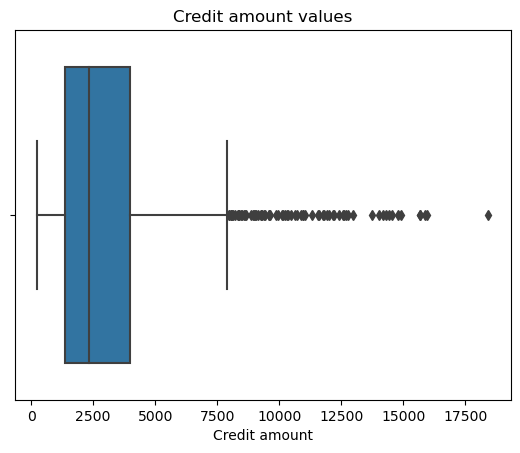

In [261]:
# Boxplot
sns.boxplot(x=df.iloc[:, 1])

# Title and label
plt.title('Credit amount values')
plt.xlabel('Credit amount')

plt.show()

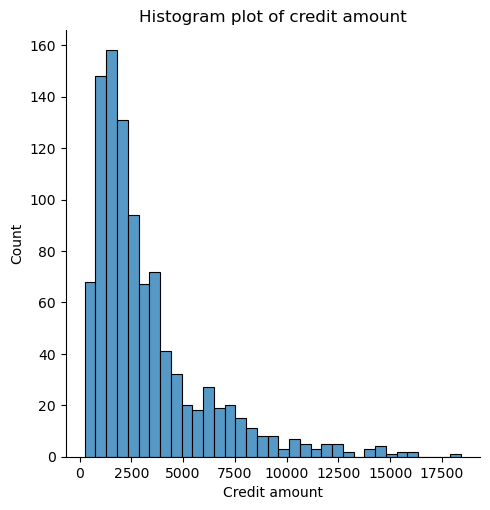

In [262]:
# Histogram plot
sns.displot(x=df.iloc[:, 1])

# Title and label
plt.title('Histogram plot of credit amount')
plt.xlabel('Credit amount')

# Display
plt.show()

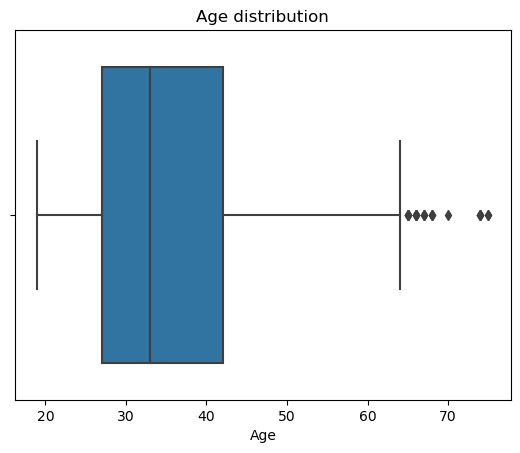

In [263]:
# Boxplot
sns.boxplot(x=df.iloc[:, 4])

# Title and label
plt.title('Age distribution')
plt.xlabel('Age')

plt.show()

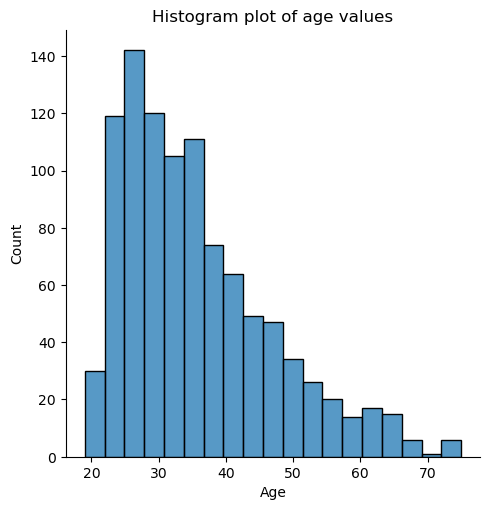

In [264]:
# Histogram plot
sns.displot(x=df.iloc[:, 4])

# Title and label
plt.title('Histogram plot of age values')
plt.xlabel('Age')

# Display
plt.show()

From these diagnostic plots, we can see clearly how both the credit amount and age features are heavily-skewed and contain outliers. This is likely to lead to a reduction in performance in our model. To deal with the outliers, we will first try to log-transform the features to normalize them and reduce the impact of any outliers on the prediction of the model.

In [265]:
df['log_age'] = np.log(df['age'])
df['log_credit_amount'] = np.log(df['credit_amount'])

# View updated dataframe
df.head()

,duration,credit_amount,installment_rate,residence_duration,age,existing_credits,num_dependents,credit_risk,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_duration_A72,employment_duration_A73,employment_duration_A74,employment_duration_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202,log_age,log_credit_amount
0,6,1169,4,4,67,2,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,4.204693,7.063904
1,48,5951,2,2,22,1,1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,3.091042,8.691315
2,12,2096,2,3,49,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,3.891820,7.647786
3,42,7882,2,4,45,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,3.806662,8.972337
4,24,4870,3,4,53,2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,3.970292,8.490849


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   duration                      1000 non-null   int64  
 1   credit_amount                 1000 non-null   int64  
 2   installment_rate              1000 non-null   int64  
 3   residence_duration            1000 non-null   int64  
 4   age                           1000 non-null   int64  
 5   existing_credits              1000 non-null   int64  
 6   num_dependents                1000 non-null   int64  
 7   credit_risk                   1000 non-null   int64  
 8   checking_account_A12          1000 non-null   uint8  
 9   checking_account_A13          1000 non-null   uint8  
 10  checking_account_A14          1000 non-null   uint8  
 11  credit_history_A31            1000 non-null   uint8  
 12  credit_history_A32            1000 non-null   uint8  
 13  cred

Text(0.5, 0, 'Log(age)')

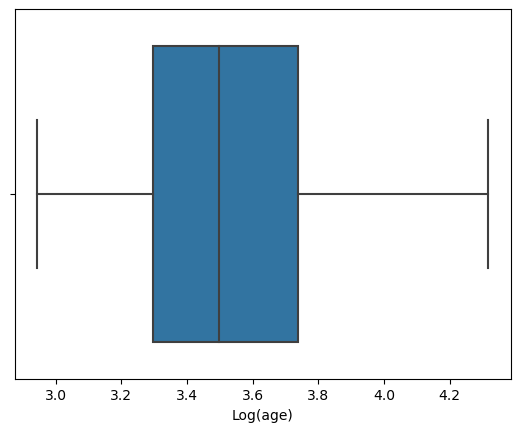

In [267]:
sns.boxplot(x=df.iloc[:,49])

plt.xlabel('Log(age)')

Text(0.5, 1.0, 'Credit amount values after logarithmic transformation')

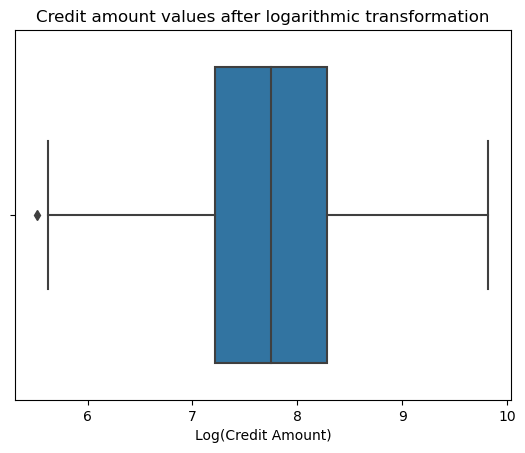

In [268]:
sns.boxplot(x=df.iloc[:, 50])

plt.xlabel('Log(Credit Amount)')
plt.title('Credit amount values after logarithmic transformation')

After revisiting the diagnostic plots, we can see how transforming the features has addressed the issue of outliers in the dataset. We will therefore drop the original columns in our dataset.

In [269]:
df =df.drop(['age', 'credit_amount'], axis=1)
df.head()

,duration,installment_rate,residence_duration,existing_credits,num_dependents,credit_risk,checking_account_A12,checking_account_A13,checking_account_A14,credit_history_A31,credit_history_A32,credit_history_A33,credit_history_A34,purpose_A41,purpose_A410,purpose_A42,purpose_A43,purpose_A44,purpose_A45,purpose_A46,purpose_A48,purpose_A49,savings_account_A62,savings_account_A63,savings_account_A64,savings_account_A65,employment_duration_A72,employment_duration_A73,employment_duration_A74,employment_duration_A75,personal_status_A92,personal_status_A93,personal_status_A94,other_debtors_A102,other_debtors_A103,property_A122,property_A123,property_A124,other_installment_plans_A142,other_installment_plans_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,telephone_A192,foreign_worker_A202,log_age,log_credit_amount
0,6,4,4,2,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,4.204693,7.063904
1,48,2,2,1,1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,3.091042,8.691315
2,12,2,3,1,2,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,3.891820,7.647786
3,42,2,4,1,2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,3.806662,8.972337
4,24,3,4,2,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,3.970292,8.490849


## Logistic Regression fit 

### Splitting the dataset into the train and test sets

In this section, we split our dataset into training and test datasets to avoid overfitting and then we scale the data to ensure that all features are considered equally in our model. This may seem unnecessary however machine learning models work using distance to evaluate the datapoints, if one feature has a much larger scale than the others it will dominate the calculation and lead to poor performance in the model. 

In [270]:
# Train test and split the datasets
x = df.drop(['credit_risk'], axis=1)
y = df['credit_risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Instance of standard scaler
scaler = StandardScaler()

# Fit scaler to training data
scaler.fit(x_train)

# Transform train and test datasets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Fit the model

In this section, we fit the prepared data in our logistic regression and make the predictions. 

In [271]:
lr = LogisticRegression()

In [272]:
model = lr.fit(x_train_scaled, y_train)

In [273]:
y_pred = model.predict(x_test_scaled)

### Evaluation of the metrics

We now evaluate the performance of the model using various metrics; these can be represented both as a single number and visually in the confusion_matrix

In [274]:
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

confusion_matrix = confusion_matrix(y_pred, y_test)

In [275]:
print("Confusion matrix\n")
print("")
print("Visualisation:")
print("[[TP, FP]")
print(" [FN, TN]]\n")
print()
print("Model:")
print(confusion_matrix)

Confusion matrix


Visualisation:
[[TP, FP]
 [FN, TN]]


Model:
[[155  35]
 [ 23  37]]


The confusion matrix is a visual representation of the model's performance, displaying the model performance in identifying positive and negative values. When looking at the matrix, we can see there are 155 true positive (TP) instances and 35 false positive (FP) instances, whilst for negative predictions there are 23 false negative (FN) instances and 37 true negative (TN) instances. This indicates that the model is better at identifying positive values than it is at negative values.

In [276]:
print(f"Accuracy score: {accuracy*100:.2f}%")
print(f"Recall score: {recall*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"F1 score: {f1*100:.2f}%")

Accuracy score: 76.80%
Recall score: 81.58%
Precision: 87.08%
F1 score: 84.24%


We use these four basic metrics to evaluate the performance of our logistic regression because they are easy to quantify and understand. Accuracy is the fraction of correct predictions out of the total number of predictions. Recall and precision are slightly more complicated, with recall being the number of correct positive predictions out of all **positive values** whereas precision being the number of correct positive predictions out of all **positive predictions**. The F1 score is simply the harmonic mean between recall and precision.